In [ ]:
! pip install pycaret[full]

     |████████████████████████████████| 301 kB 3.6 MB/s 
     |████████████████████████████████| 1.3 MB 8.2 MB/s 
     |████████████████████████████████| 6.8 MB 20.8 MB/s 
     |████████████████████████████████| 261 kB 16.6 MB/s 
     |████████████████████████████████| 2.0 MB 34.0 MB/s 
     |████████████████████████████████| 114 kB 42.7 MB/s 
     |████████████████████████████████| 274 kB 37.9 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 167 kB 41.1 MB/s 
     |████████████████████████████████| 15.6 MB 42.1 MB/s 
     |████████████████████████████████| 1.7 MB 48.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 356 kB 39.1 MB/s 
     |████████████████████████████████| 59 kB 5.4 MB/s 
     |████████████████████

In [ ]:
! pip install rioxarray

     |████████████████████████████████| 47 kB 1.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 3.2 MB/s 
     |████████████████████████████████| 6.3 MB 34.2 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54611 sha256=6e4bbb1be5dab025d711e9344285f3da1e2afe5360f6c608bc75e0a3ab54b73c
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [ ]:
import rioxarray as rxr
from pycaret.regression import* 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import pandas as pd


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
data = rxr.open_rasterio('/content/202010_1yr_median_clipped.tif')

In [ ]:
data

<xarray.DataArray (band: 16, y: 412, x: 793)>
[5227456 values with dtype=float64]
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * x            (x) float64 3.165e+05 3.165e+05 ... 3.244e+05 3.244e+05
  * y            (y) float64 4.45e+06 4.45e+06 4.45e+06 ... 4.446e+06 4.446e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     stackstac-2def63b493e1413ae9abc6d4d5850467

In [ ]:
import numpy as np
data_numpy = np.array(data)

In [ ]:
data_numpy.shape

(16, 412, 793)

In [ ]:
#Shuffle the pixel and seperate them into train and test set
lon_indices = list(range(data_numpy.shape[1]))
lat_indices = list(range(data_numpy.shape[2]))
train_lon_indices, test_lon_indices = train_test_split(lon_indices, test_size=0.2, random_state=42)
train_lat_indices, test_lat_indices = train_test_split(lat_indices, test_size=0.2, random_state=42)


In [ ]:
# Train data
train = data_numpy[:,train_lon_indices, :]
train = train[:,:,train_lat_indices]

In [ ]:
train.shape

(16, 329, 634)

In [ ]:
# Test data
test =data_numpy[:,test_lon_indices, :]
test = test[:,:,test_lat_indices]

In [ ]:
test.shape

(16, 83, 159)

In [ ]:
# target_train is the depth data for training, target_test is the depth data for testing
target_train = train[15,:,:]
target_test = test[15,:,:]

In [ ]:
target_test.shape

(83, 159)

In [ ]:
target_train.shape

(329, 634)

In [ ]:
train_dropT = train[:15,:,:]
test_dropT = test[:15,:,:]

In [ ]:
train_dropT.shape

(15, 329, 634)

In [ ]:
target_train.shape

(329, 634)

In [ ]:
# Reshape dimension to 2D 
train_dropT_2D = train_dropT.reshape((train_dropT.shape[0],train_dropT.shape[1]*train_dropT.shape[2]))
target_train_1D = target_train.reshape(target_train.shape[0]*target_train.shape[1])

In [ ]:
# Turn NaN into 0
train_dropT_2D = np.nan_to_num(train_dropT_2D)
target_train_1D = np.nan_to_num(target_train_1D)
train_dropT_2D.transpose().shape

(208586, 15)

In [ ]:
target_train_1D.shape

(208586,)

In [ ]:
test_dropT = test_dropT.reshape((test_dropT.shape[0],test_dropT.shape[1]*test_dropT.shape[2]))
test_dropT = np.nan_to_num(test_dropT)

In [ ]:
train_dropT_2D.transpose().shape

(208586, 15)

In [ ]:
X_train = train_dropT_2D.transpose()

In [ ]:
X_train.shape

(208586, 15)

In [ ]:
y_train = target_train_1D

In [ ]:
y_train.shape

(208586,)

In [ ]:
test_dropT.transpose().shape

(13197, 15)

In [ ]:
X_test = test_dropT.transpose()

In [ ]:
X_test.shape

(13197, 15)

In [ ]:
target_test = target_test.reshape(target_test.shape[0]*target_test.shape[1])

In [ ]:
target_test = np.nan_to_num(target_test)
target_test.shape

(13197,)

In [ ]:
y_test = target_test 

In [ ]:
y_test.shape

(13197,)

In [ ]:
DataArray.to_dataframe(name=None, dim_order=None)

NameError: ignored

### Linear Regression

In [ ]:
# Linear regression model
model = LinearRegression()
model.fit(X_train,y_train)
r_sq = model.score(X_train,y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8606388135147831


In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.2079226507921703e-13
slope: [-0.00062529  0.00087893  0.00536892 -0.00096024 -0.01210218  0.01137159
 -0.01460585 -0.00198327  0.01000366 -0.00186246 -0.00473128  0.00799577
  0.08177114 -0.00777303  0.55489383]


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
R_square = model.score(X_test,y_test)
print('The Mean Square Error(MSE): ',mse)
print('R square:',R_square)

The Mean Square Error(MSE):  2.360852964716618
R square: 0.878557965072365


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
pred = model.predict(X_test)

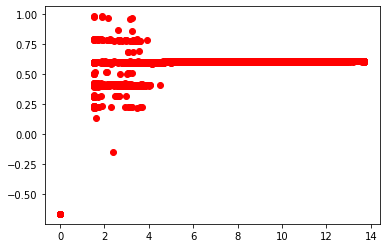

In [ ]:
plt.scatter(y_test, pred,  color='red')
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



In [ ]:
def print_evaluate(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [ ]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print_evaluate(y_test, test_pred)
print_evaluate(y_train, train_pred)

MAE: 3.3140885450500783
MSE: 26.059928932534905
RMSE: 5.10489264652401
R2 Square -0.34052007767305703
__________________________________
MAE: 4.040365624274999
MSE: 32.40401317770077
RMSE: 5.692452299115098
R2 Square -0.5768095934674409
__________________________________


In [ ]:
result = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
result

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.314089,26.059929,5.104893,-0.34052


### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=300,eta0 = 0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.879053067513536
MSE: 2.485128194755603
RMSE: 1.576428937426487
R2 Square 0.8721652599557862
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.1010780854371411
MSE: 3.0662266890896825
RMSE: 1.7510644445849737
R2 Square 0.8507945410159972
__________________________________


In [ ]:
result_1 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
result = result.append(result_1, ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.314089,26.059929,5.104893,-0.340520
1,Stochastic Gradient Descent,0.879053,2.485128,1.576429,0.872165


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [ ]:
dt.fit(X_train, y_train)

test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.29680061179700495
MSE: 0.7736051113209954
RMSE: 0.8795482427479435
R2 Square 0.9602058322338095
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.0963781957822604e-17
MSE: 1.0485373268499718e-31
RMSE: 3.2381126089899526e-16
R2 Square 1.0
__________________________________


In [ ]:
result_2 = pd.DataFrame(data=[["Decision Tree", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
result = result.append(result_2, ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.314089,26.059929,5.104893,-0.340520
1,Stochastic Gradient Descent,0.879053,2.485128,1.576429,0.872165
2,Decision Tree,0.296801,0.773605,0.879548,0.960206


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=1000)
model = rfc.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.24307741262142019
MSE: 0.3702173629636843
RMSE: 0.6084548980521763
R2 Square 0.9809560567321272
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.07733211780221994
MSE: 0.03543873925890124
RMSE: 0.18825179749182008
R2 Square 0.9982755177965956
__________________________________


In [ ]:
result_3 = pd.DataFrame(data=[["Random forest", *evaluate(y_test, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
result = result.append(result_3, ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.314089,26.059929,5.104893,-0.340520
1,Stochastic Gradient Descent,0.879053,2.485128,1.576429,0.872165
2,Decision Tree,0.296801,0.773605,0.879548,0.960206
3,Random forest,0.243077,0.370217,0.608455,0.980956


### Ridge Regressor

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, tol=0.0005, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.8579309122306604
MSE: 2.366217467513292
RMSE: 1.5382514318255296
R2 Square 0.878282015597434
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.0685998317314853
MSE: 2.8887005179203835
RMSE: 1.699617756414772
R2 Square 0.8594331305714392
__________________________________


In [ ]:
result_4 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
result = result.append(result_4, ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.314089,26.059929,5.104893,-0.340520
1,Stochastic Gradient Descent,0.879053,2.485128,1.576429,0.872165
2,Decision Tree,0.296801,0.773605,0.879548,0.960206
3,Random forest,0.243077,0.370217,0.608455,0.980956
4,Ridge Regression,0.857931,2.366217,1.538251,0.878282


### ElasticNet Regressor 

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.9509971660518706
MSE: 2.694913125129569
RMSE: 1.6416190560326622
R2 Square 0.8613739446038686
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.218028161130757
MSE: 3.5071509118661433
RMSE: 1.8727388797870737
R2 Square 0.8293387558744041
__________________________________


In [ ]:
result_5 = pd.DataFrame(data=[["Elastic Net", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
result = result.append(result_5, ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.314089,26.059929,5.104893,-0.340520
1,Stochastic Gradient Descent,0.879053,2.485128,1.576429,0.872165
2,Decision Tree,0.296801,0.773605,0.879548,0.960206
3,Random forest,0.243077,0.370217,0.608455,0.980956
4,Ridge Regression,0.857931,2.366217,1.538251,0.878282
5,Elastic Net,0.950997,2.694913,1.641619,0.861374


### LightGBM Regressor

In [ ]:
! pip install lightgbm

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(n_estimators=300, max_depth=2, bagging_fraction=0.9, random_state=42)

In [ ]:
lgb_model.fit(X_train, y_train)

test_pred = lgb_model.predict(X_test)
train_pred = lgb_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.4510007450753285
MSE: 0.8440279661297024
RMSE: 0.9187099466805083
R2 Square 0.9565832877885609
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.53324881024046
MSE: 0.9507476555495958
RMSE: 0.9750628982530285
R2 Square 0.9537357297068088
__________________________________


In [ ]:
result_6 = pd.DataFrame(data=[["LightGBM", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
result = result.append(result_6, ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.314089,26.059929,5.104893,-0.340520
1,Stochastic Gradient Descent,0.876261,2.483284,1.575844,0.872260
2,Decision Tree,0.299203,0.788239,0.887828,0.959453
3,Random forest,0.242951,0.370750,0.608893,0.980929
4,Ridge Regression,0.857931,2.366217,1.538251,0.878282
5,Elastic Net,0.950997,2.694913,1.641619,0.861374
6,LightGBM,0.451001,0.844028,0.918710,0.956583


### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model = lasso.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 1.2104767439901194
MSE: 4.577297230531553
RMSE: 2.139461902098645
R2 Square 0.7645442988394224
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.499408582114369
MSE: 5.495779719134758
RMSE: 2.3443079403386315
R2 Square 0.7325702178556401
__________________________________


In [ ]:
result_7 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
result = result.append(result_7, ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.314089,26.059929,5.104893,-0.340520
1,Stochastic Gradient Descent,0.876261,2.483284,1.575844,0.872260
2,Decision Tree,0.299203,0.788239,0.887828,0.959453
3,Random forest,0.242951,0.370750,0.608893,0.980929
4,Ridge Regression,0.857931,2.366217,1.538251,0.878282
5,Elastic Net,0.950997,2.694913,1.641619,0.861374
6,LightGBM,0.451001,0.844028,0.918710,0.956583
7,Lasso Regression,1.210477,4.577297,2.139462,0.764544


### Robust Regression

In [ ]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
rr = ransac.fit(X_train, y_train)

test_pred = rr.predict(X_test)
train_pred = rr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 2.616835434405639
MSE: 103.7029980072139
RMSE: 10.183466895277556
R2 Square -4.334471605945278
__________________________________
Train set evaluation:
_____________________________________
MAE: 2.806058282936428
MSE: 95.29336282784232
RMSE: 9.761831940155615
R2 Square -3.63706417710379
__________________________________


In [ ]:
result_8 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
result = result.append(result_8, ignore_index=True)
result

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,3.314089,26.059929,5.104893,-0.340520
1,Stochastic Gradient Descent,0.876261,2.483284,1.575844,0.872260
2,Decision Tree,0.299203,0.788239,0.887828,0.959453
3,Random forest,0.242951,0.370750,0.608893,0.980929
4,Ridge Regression,0.857931,2.366217,1.538251,0.878282
5,Elastic Net,0.950997,2.694913,1.641619,0.861374
6,LightGBM,0.451001,0.844028,0.918710,0.956583
7,Lasso Regression,1.210477,4.577297,2.139462,0.764544
8,Robust Regression,2.616835,103.702998,10.183467,-4.334472


### Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1000, epsilon=0.001)
model = svr.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

In [1]:
#import pandas as pd
#result_9 = pd.DataFrame(data=[["Support Vector Machine", *evaluate(y_test, test_pred)]], 
                            #columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
#result = result.append(result_9, ignore_index=True)
#result